In [31]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

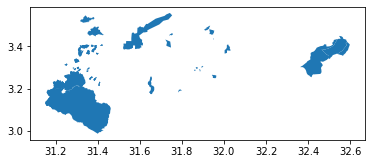

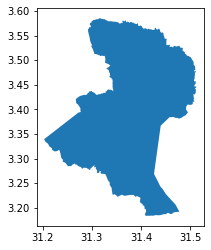

In [85]:
all_camps = geopandas.read_file("input_files/adm_boundaries/hotosm_uga_rr_refugee_camps_polygons.shp")
all_camps.plot()
bidibidi = geopandas.read_file("input_files/adm_boundaries/camp_polygon.shp")
bidibidi.plot()

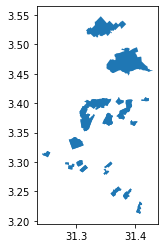

In [93]:
all_zones = geopandas.sjoin(all_camps,bidibidi,op='within')
all_zones = all_zones.drop(columns=["index_right"]) # 
all_zones.plot()

Text(0.5, 1.0, '81534 buildings')

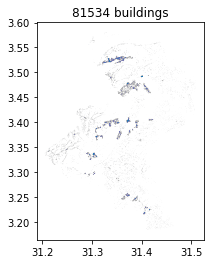

In [55]:
# Reading, plotting and counting the buildings within the camp's perimeters 
buildings_in_district = geopandas.read_file("input_files/building_polygons/rr_within.shp")
buildings_in_district.plot()
plt.title("%s buildings"%len(buildings_in_district))

Text(0.5, 1.0, '73192 buildings')

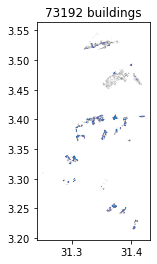

In [119]:
# Spatial join, plot and count of the buildings within the zones' perimeters 
all_zones_joined = geopandas.sjoin(buildings_in_district,all_zones)
all_zones_joined.to_file("input_files/building_polygons/all_zones.shp")
all_zones_joined.plot()
plt.title("%s buildings"%len(all_zones_joined))

In [117]:
# Create separate geodataframes for every zone 
for zindex in range(1,6): 
    tmp_gdf = all_zones[all_zones.name == "Zone 0%s"%zindex]
    joined_tmp = geopandas.sjoin(buildings_in_district, tmp_gdf);
    joined_tmp.to_file("input_files/building_polygons/per_zone/zone_%s.shp"%zindex);

In [118]:
# Count and list the number of buildings per zone 
for index in range(1,6): 
    tmp = geopandas.read_file("input_files/building_polygons/per_zone/zone_%s.shp"%index)
    print("Zone ",index," counts ",len(tmp)," buildings")

Zone  1  counts  13134  buildings
Zone  2  counts  10148  buildings
Zone  3  counts  25096  buildings
Zone  4  counts  8276  buildings
Zone  5  counts  16538  buildings


Text(129.49443164270627, 0.5, 'Longitude')

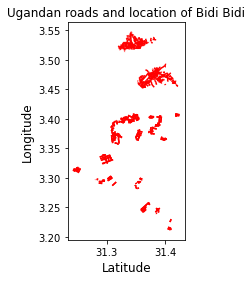

In [123]:
from data_prep_funcs import roads_within_polygon
import seaborn 

roads_intersect, roads_within = roads_within_polygon(address_of_road_shp="input_files/roads/hotosm_uga_roads_lines.shp",
                                                      polygon=all_zones)
seaborn.set_context( rc={"axes.labelsize":12})
fig,ax = plt.subplots()
roads_within.plot(ax=ax,color='red')
plt.title("Ugandan roads and location of Bidi Bidi")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [124]:
# Save the results from joining roads to the zone polygons
roads_intersect.to_file("input_files/roads/roads_all_zones_intersect.shp")
roads_within.to_file("input_files/roads/roads_all_zones_within.shp")

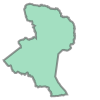

In [3]:

bidibidi.geometry[0]

In [2]:
from data_prep_funcs import make_grid_gdf, get_polygon_extremes
import geopandas 

bidibidi = geopandas.read_file("input_files/adm_boundaries/camp_polygon.shp")

extr_x,extr_y = get_polygon_extremes(bidibidi.geometry[0])
print("Extreme x values are ",extr_x,"\nExtreme y values are ",extr_y)

x_steps=5

roads_within = geopandas.read_file("input_files/roads/roads_all_zones_within.shp")

gdf = make_grid_gdf(extr_x=extr_x,
                        extr_y=extr_y,
                        x_steps=x_steps,
                        roads_shp=roads_within);

gdf.to_file("save_files/grid_%s.shp"%x_steps)

Extreme x values are  [31.20268, 31.5128083] 
Extreme y values are  [3.1833812, 3.5854929]
We are at  0  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  1  Out of  30
We are at  2  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  3  Out of  30
We are at  4  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  5  Out of  30
We are at  6  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  7  Out of  30
We are at  8  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  9  Out of  30
We are at  10  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  11  Out of  30
We are at  12  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  13  Out of  30
We are at  14  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  15  Out of  30
We are at  16  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  17  Out of  30
We are at  18  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  19  Out of  30
We are at  20  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  21  Out of  30
We are at  22  Out of  30
We are at 

/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


 23  Out of  30
We are at  24  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  25  Out of  30
We are at  26  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  27  Out of  30
We are at  28  Out of  30


/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);
/home/daan/Documents/OptimisationModel/data_prep_funcs.py:119: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  sjoined_roads = gp.sjoin(roads_shp,list_of_gdfs[index]);


We are at  29  Out of  30


Cell size is  6.888457901821289  km


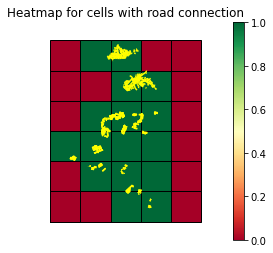

In [4]:
from data_prep_funcs import make_road_heatmap
import geopandas



make_road_heatmap(grid_gdf=gdf,
                      roads_shp=roads_within,
                      extr_x=extr_x,
                      extr_y=extr_y,
                      x_steps=x_steps)

In [116]:
def facspecs(hh_per_fac,
            nb_visits):
    
    service_hours = 12*30
    nom_service = 60/ (nb_visits * hh_per_fac / service_hours ) 
    
    print("one service per ",nom_service," minutes")

facspecs(hh_per_fac=2500,
         nb_visits=4)

one service per  2.16  minutes
